1. Name:- Devendrasingh Bhavsingh Solanki
2. Batch:- 23rd April 2023
3. Project Name:- Chemical property modeling for Ultratech cement and Aditya birla group

# data cleaning/data pre-processing

In [1]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import necessary liabrary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.feature_selection import RFE,VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Create df
Cement_df=pd.read_csv(r"D:\Inside AIML\Ask Talos\Material Compressive Strength Experimental Data (1).csv")

In [4]:
Cement_df.head(5)

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07


In [5]:
Cement_df.info() # Total info.about datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


**There is no object column present in the given datasets hence no need of lable encoding**

In [6]:
Cement_df.isnull().sum() # Calculate null values 

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64

**In the above result null values are present. null values are only 1.7% of entire datasets,it's better to replace null values with mean value** 

In [7]:
#List of the column
columns=Cement_df.columns
# Iterate through each column and replace null values
for col in columns:
    replace_value = Cement_df[col].mean()
    Cement_df[col].fillna(replace_value, inplace=True)

In [8]:
Cement_df.isnull().sum() # Calculate null values

Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
Compression Strength MPa      0
dtype: int64

In [9]:
Var=VarianceThreshold() # Initialize variance threeshold to check constant column 
Var.fit(Cement_df) # Train model
feature=Var.get_support()
key=np.array(feature) # Convert into array
Constant=Cement_df.columns[key==False] # Calculate constant column
Constant # output shows

Index([], dtype='object')

n the above result as we see no constant column present in the dataset

# Exploratory Data Analysis

Univariate Analysis: Univariate analysis involves the exploration of a single variable at a time.

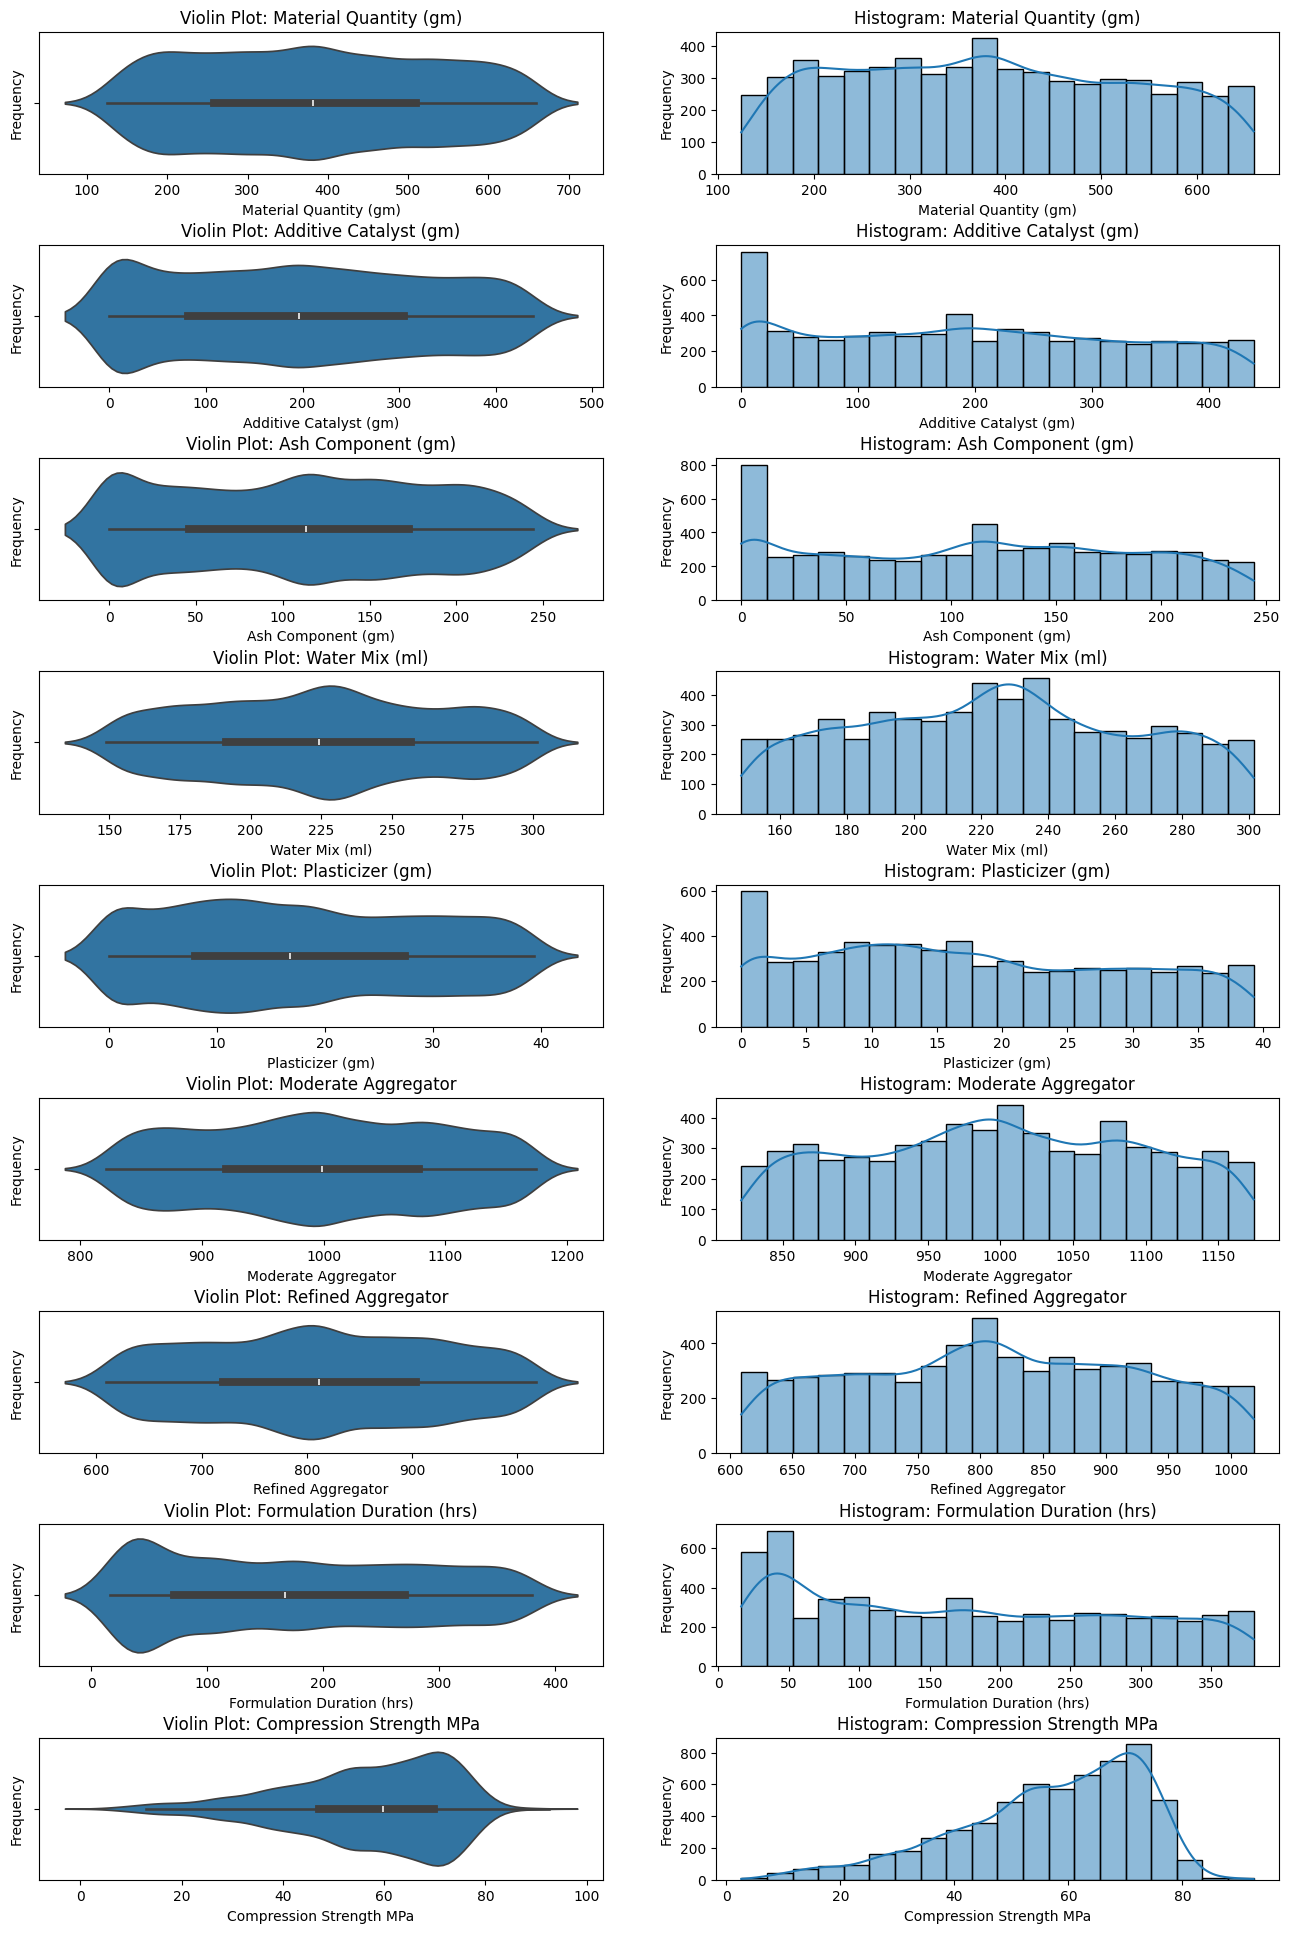

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Cement_df is your DataFrame
fig, axes = plt.subplots(nrows=len(Cement_df.columns)//1, ncols=2, figsize=(16, 24))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Plot Violin Plots
for ax, col in zip(axes[:, :1].flatten(), Cement_df.columns):
    sns.violinplot(x=Cement_df[col], ax=ax)
    ax.set_title(f'Violin Plot: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Plot Histograms
for ax, col in zip(axes[:, 1:].flatten(), Cement_df.columns):
    sns.histplot(Cement_df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()


Visualize the co-relation of other features with Compression Strength.

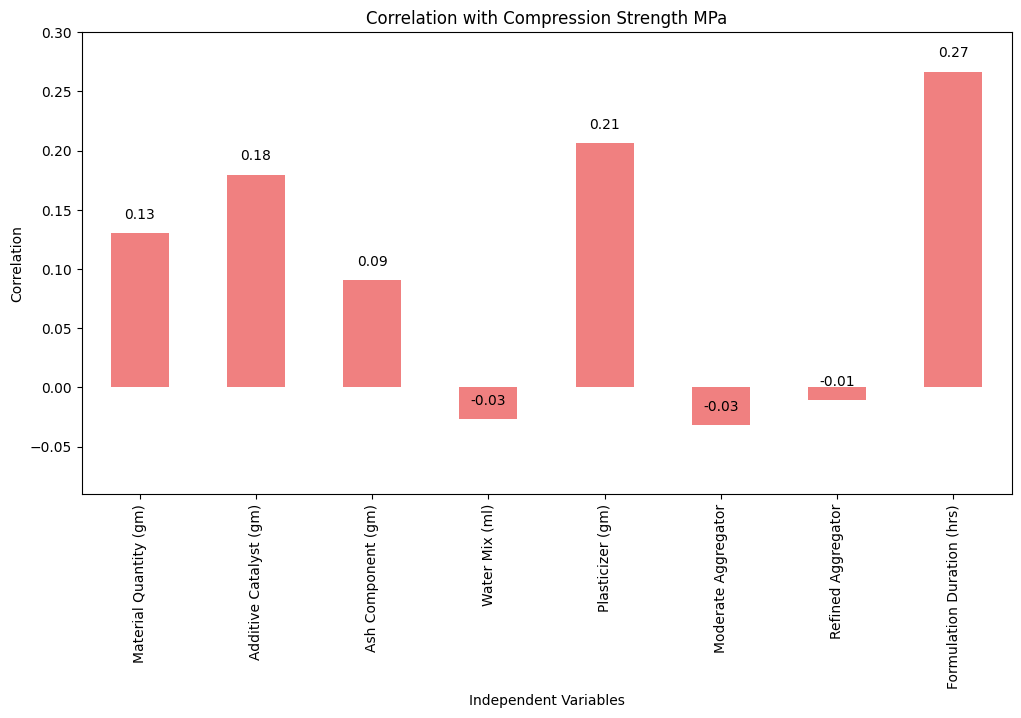

In [11]:
# Calculate correlation matrix
correlation_matrix = Cement_df.corr()['Compression Strength MPa']
correlation_matrix=correlation_matrix.drop('Compression Strength MPa')
# Plot a bar graph for correlation with the dependent variable
plt.figure(figsize=(12, 6))
ax = correlation_matrix.plot(kind='bar', color='lightcoral')
plt.title('Correlation with Compression Strength MPa')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation')
plt.ylim(-0.09,0.30)

# Add annotations
for i, value in enumerate(correlation_matrix):
    ax.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()

**Only 5 feature column are good co-related to Target column**

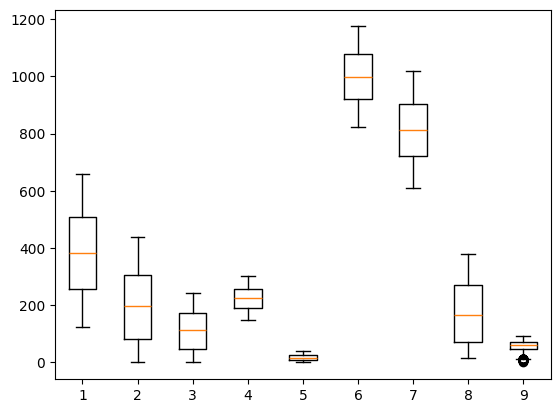

In [12]:
# Calculate outlier 
plt.boxplot(Cement_df)
plt.show()

**There is no outlier present in the feature column**

To visualize the distribution of your entire dataset, including the density and skewness of each variable.

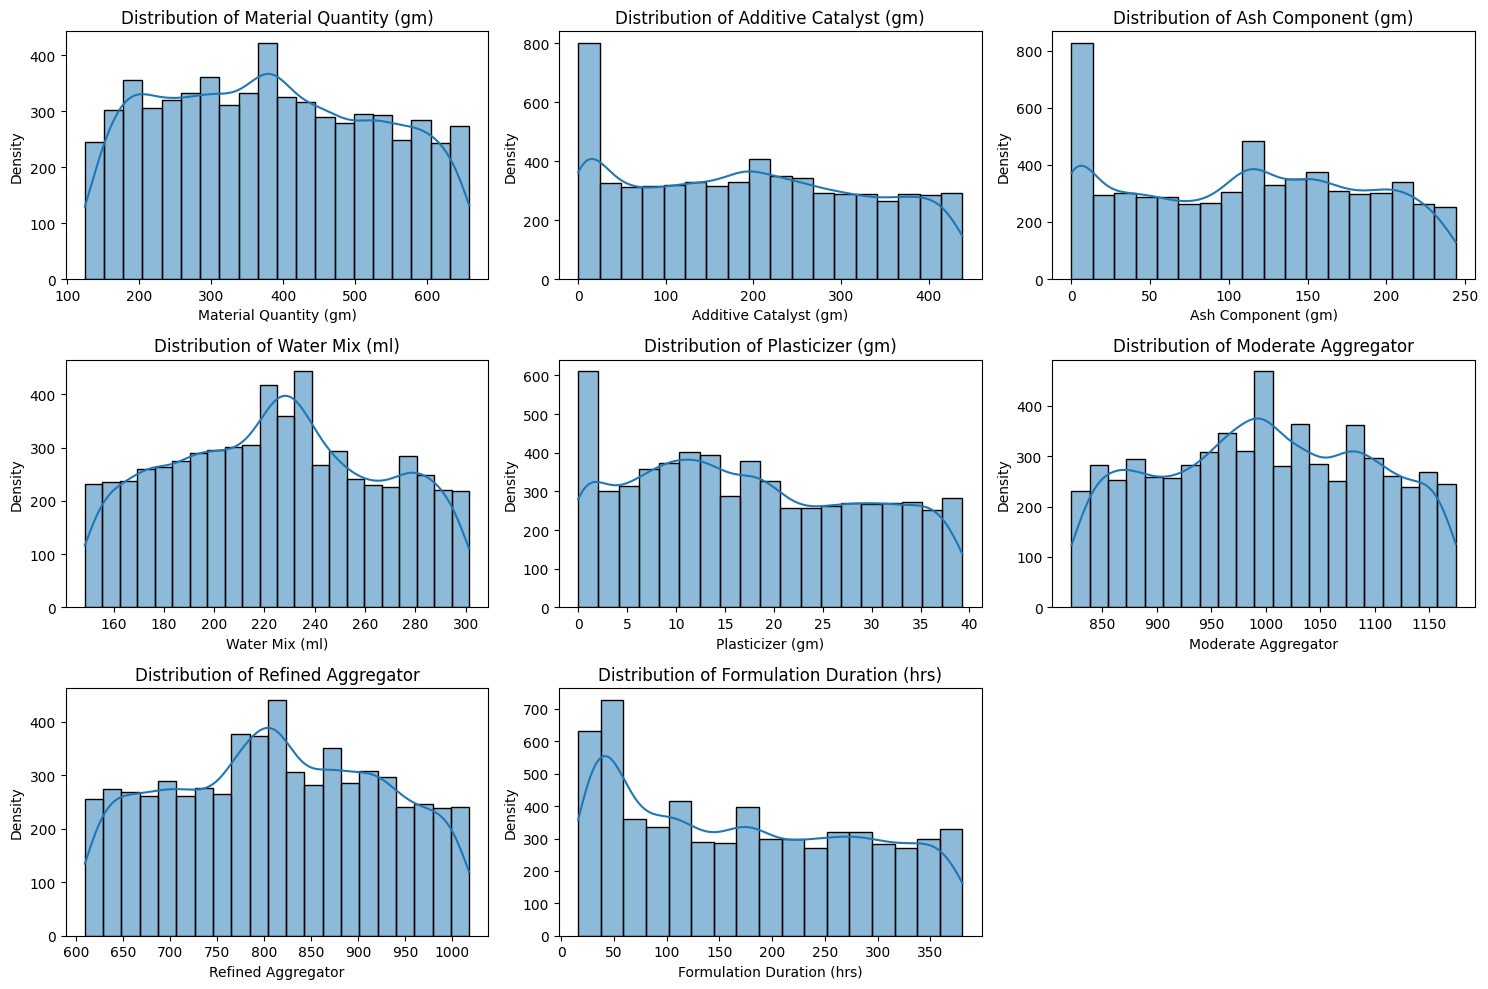

In [13]:
independent_variables=Cement_df.columns[:-1]
# Histograms for each variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(independent_variables):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot dimensions based on the number of variables
    sns.histplot(Cement_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

**Above data is not normally distributed Hence we do std. scaler for normalizing data**

In [14]:
# Specify the features to be scaled (exclude the dependent variable)
features_to_scale = Cement_df.columns[:-1]

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
Cement_df_standard = pd.DataFrame(standard_scaler.fit_transform(Cement_df[features_to_scale]), columns=features_to_scale)

print("\nStandard Scaled Dataset:\n")
print(Cement_df_standard.head())


Standard Scaled Dataset:

   Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                0.691433               -0.121849           -1.231379   
1               -1.684034                0.480137            1.002321   
2                1.186238               -1.467198           -0.001308   
3                0.052391                1.168175           -0.482055   
4                0.074928                1.179982            1.121251   

   Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  Refined Aggregator  \
0       -0.549816         -0.133050             1.574556           -0.924276   
1       -1.173300         -0.982587             0.948866            1.774783   
2        1.722853         -0.492204             0.271139           -0.010218   
3        1.817821          0.116459             1.406363            0.621723   
4        0.273076         -0.054485             1.028058           -0.275697   

   Formulation Duration (hrs)  
0                    

**After normalization of data we do feature engineering to find best feature column which is co-related with target column**

In [15]:

# Assuming X contains your features and y contains your target variable
X = Cement_df[Cement_df_standard.columns]
y = Cement_df['Compression Strength MPa']

# Use RFE with a regression model (e.g., RandomForestRegressor)
model = RandomForestRegressor()
num_top_features=5
rfe = RFE(model, n_features_to_select=num_top_features)
fit = rfe.fit(X, y)

# Get the selected top features
top_features = X.columns[fit.support_]

# Display the top features
print(f'Top {num_top_features} features:')
print(top_features)


Top 5 features:
Index(['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Plasticizer (gm)',
       'Refined Aggregator', 'Formulation Duration (hrs)'],
      dtype='object')


**We find top 5 feature column for model now we start phase 5 for creating model**

# Predictive Modelling

**Perform different regression model on top of selected features.**

In [16]:
# X contains our selected features and y contains our target variable
X = Cement_df_standard[['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Plasticizer (gm)',
       'Refined Aggregator', 'Formulation Duration (hrs)']]
y = Cement_df['Compression Strength MPa']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Store R-squared scores and MSE for visualization
r2_scores = {}
losses={}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    losses[name]=mse
    r2 = r2_score(y_test, y_pred)*100
    r2_scores[name] = r2
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")


Model: Linear Regression
Mean Squared Error: 219.26240497289677
R-squared: 13.542783379378298


Model: Decision Tree Regression
Mean Squared Error: 277.25417279156153
R-squared: -9.323912957054127


Model: Random Forest Regression
Mean Squared Error: 148.80034591196917
R-squared: 41.32663216329859


Model: Support Vector Regression
Mean Squared Error: 174.55066159649118
R-squared: 31.173041895686104




**Plot graph of loss and accuracy.**

Visualize R-squared scores

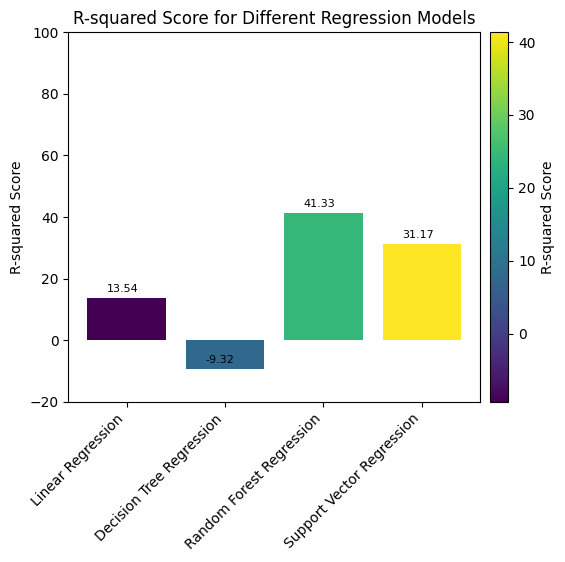

In [17]:
# Visualize R-squared scores with annotations and colormap
fig, ax = plt.subplots()
bars = ax.bar(r2_scores.keys(), r2_scores.values(), color=plt.cm.viridis(np.linspace(0, 1, len(r2_scores))))

ax.set_ylabel('R-squared Score')
ax.set_title('R-squared Score for Different Regression Models')
ax.set_ylim(-20, 100)  # R-squared is between 0 and 1

# Rotate x-axis labels for better readability
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(r2_scores.keys(), rotation=45, ha="right")

# Add annotations
for bar, r2 in zip(bars, r2_scores.values()):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 2, f'{r2:.2f}', fontsize=8)

# Add colormap
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(r2_scores.values()), vmax=max(r2_scores.values())))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', ax=ax, pad=0.02)
cbar.set_label('R-squared Score')

plt.show()


Visualize Mean Squared Error

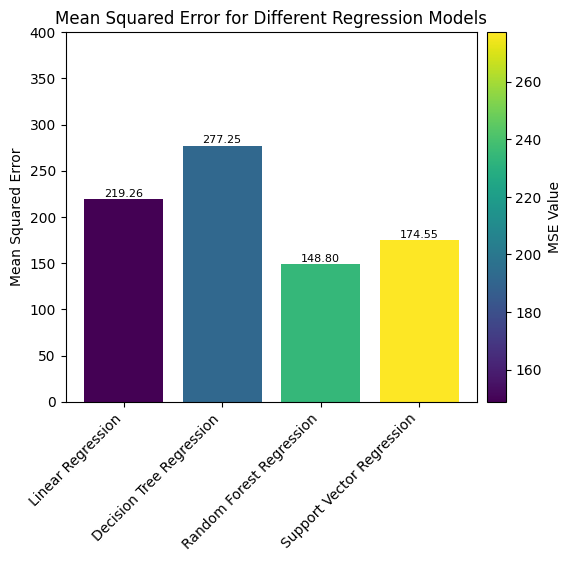

In [18]:
# Visualize Mean Squared Error (MSE) with annotations and colormap
fig, ax = plt.subplots()
bars = ax.bar(losses.keys(), losses.values(), color=plt.cm.viridis(np.linspace(0, 1, len(losses))))

ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Error for Different Regression Models')
ax.set_ylim(0, 400)  # Adjust ylim based on the MSE values

# Rotate x-axis labels for better readability
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(losses.keys(), rotation=45, ha="right")

# Add annotations
for bar, mse in zip(bars, losses.values()):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 3, f'{mse:.2f}', fontsize=8)

# Add colormap
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(losses.values()), vmax=max(losses.values())))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', ax=ax, pad=0.02)
cbar.set_label('MSE Value')

plt.show()


**Do hyper-parameter tuning, if model is not working well on selected features.**

We are using RF model for hyper tuning because this model has high accuracy.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Create a Random Forest regressor
rf_model = RandomForestRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the tuned model
r2_tuned = r2_score(y_test, y_pred)
print(f"Tuned Model R-squared: {r2_tuned}")


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Tuned Model R-squared: 0.4387459692593976


In [23]:
# Create the RandomForestRegressor with the specified hyperparameters
rf_model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 0.44155154468861857


In [25]:
import pickle

# Save the best-tuned model to a file using pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
    
scaler = StandardScaler()
scaler.fit(X_train) 
with open('standard_scaler_model.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


**Once done with the modelling, then create a table at the end which comprises of model name, value of hyperparameter, accuracy/MSE/MAD/etc (on Train and Test data).**

In [21]:

# Create a list to store the results
results_list = []

# Add the baseline model results
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)
y_train_pred_baseline = baseline_model.predict(X_train)
y_test_pred_baseline = baseline_model.predict(X_test)

results_list.append({
    'Model': 'Baseline',
    'Hyperparameters': 'Default',
    'Train Metric': r2_score(y_train, y_train_pred_baseline),
    'Test Metric': r2_score(y_test, y_test_pred_baseline),
    'Train Metric (MSE)': mean_squared_error(y_train, y_train_pred_baseline),
    'Test Metric (MSE)': mean_squared_error(y_test, y_test_pred_baseline)
})

# Add the tuned model results
results_list.append({
    'Model': 'Tuned RF',
    'Hyperparameters': grid_search.best_params_,
    'Train Metric': r2_score(y_train, best_model.predict(X_train)),
    'Test Metric': r2_score(y_test, y_pred),
    'Train Metric (MSE)': mean_squared_error(y_train, best_model.predict(X_train)),
    'Test Metric (MSE)': mean_squared_error(y_test, y_pred)
})

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

# Display the results table
results


,Model,Hyperparameters,Train Metric,Test Metric,Train Metric (MSE),Test Metric (MSE)
0,Baseline,Default,0.901909,0.412311,25.648888,149.042650
1,Tuned RF,"{'max_depth': 10, 'n_estimators': 100}",0.511383,0.438746,127.764248,142.338504


Visulize Result dataframe  

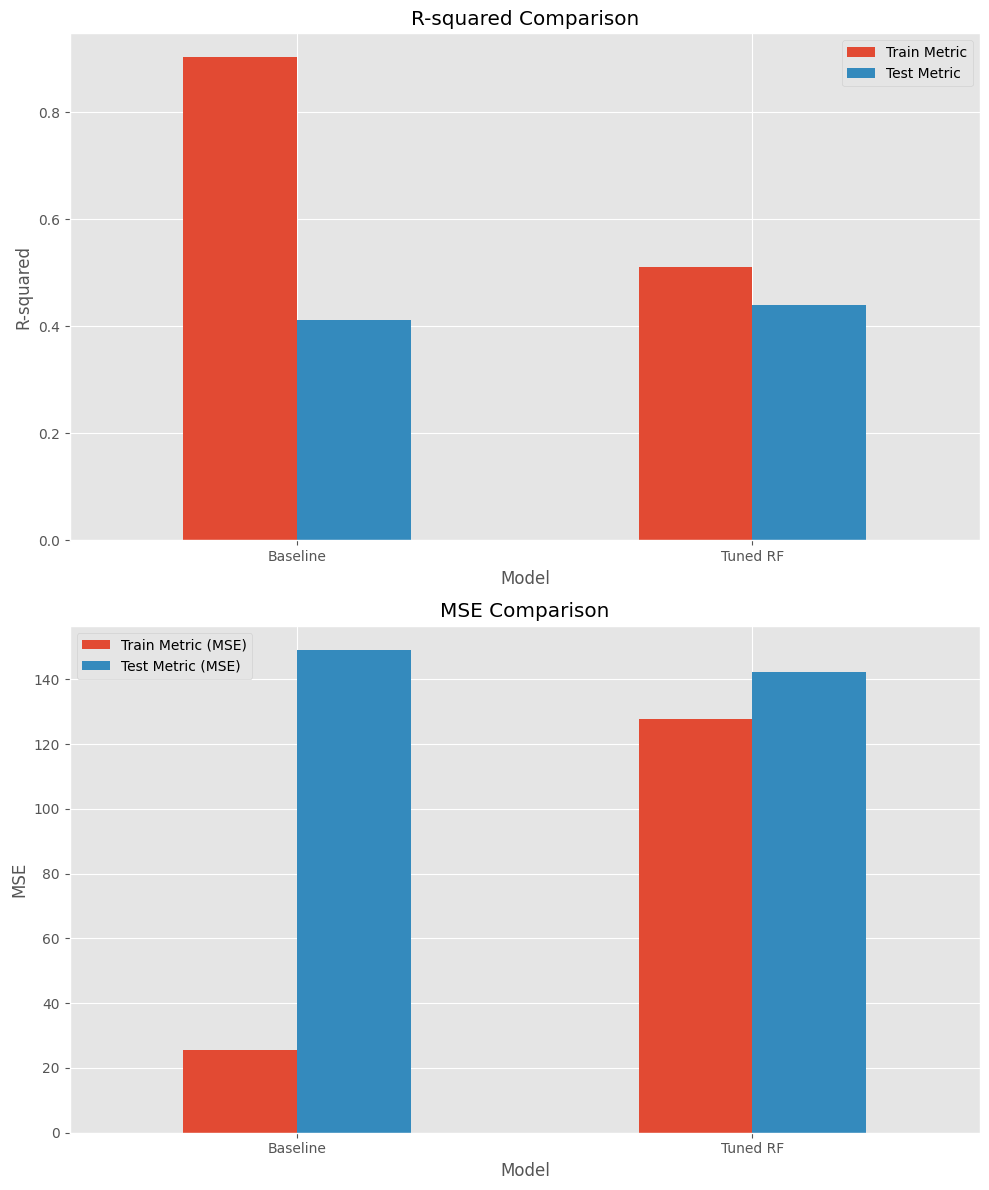

In [22]:
# Set the style of the visualization
plt.style.use('ggplot')

# Create subplots for R-squared and MSE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot R-squared values
results.set_index('Model')[['Train Metric', 'Test Metric']].plot(kind='bar', ax=ax1, rot=0)
ax1.set_ylabel('R-squared')
ax1.set_title('R-squared Comparison')

# Plot MSE values
results.set_index('Model')[['Train Metric (MSE)', 'Test Metric (MSE)']].plot(kind='bar', ax=ax2, rot=0)
ax2.set_ylabel('MSE')
ax2.set_title('MSE Comparison')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Do the comparison of different modelsand write the conclusion, so that you can go with the best model for deployment.**


**Conclusions:**

1. Random Forest Regression: This model has the highest R-squared and is a strong candidate for deployment. Random Forests often perform well due to their ability to capture complex relationships in the data.

2. Support Vector Regression (SVR): SVR is the second-best model, suggesting that it also captures the underlying patterns in the data. SVR can be powerful, especially when dealing with non-linear relationships.

3. Linear Regression: Linear Regression is performing decently but has a lower R-squared compared to Random Forest and SVR. However, it's a simple and interpretable model.

3. Decision Tree Regression: Decision trees seem to be the weakest performer in this case. Decision trees can sometimes overfit to the training data and might not generalize well to unseen data.

 In summary, based on the R-squared values, Random Forest Regression appears to be the best-performing model for our specific task. However, it's always a good practice to further validate our chosen model, possibly with additional evaluation metrics or cross-validation, before deploying it in a production environment.





